## Data Cleaning: Transformations and Exception Handling

This section of the code follows the data collection part. 

In [1]:
#Alvin Lee
#This code accomplishes 3 data transformations:
#1. Numeric values of song key to corresponding 12tone key
#2. Numeric values for song mode to corresponding mode (only major and minor)
#3. All dates are changed to year only for consistency purposes.

#Furthermore, exceptions and null-values are checked via else statements.
#None were found so no exception handling was necessary.

import pandas as pd

#Import the data_file.csv into a pandas dataframe
#data_file = "/drive/My Drive/Colab Notebooks/data_file.csv"
data_file = '/Users/alvinlee/Downloads/data_file.csv'
df = pd.read_csv(data_file)

#Drop any potential null rows containing no values
df = df.dropna(how = 'all')

#check first 5 rows of dataframe to see if loaded correctly
print(df.head(5))
print(df.columns)

pd.options.mode.chained_assignment = None

#iterate through key column to replace key values with string
for i in range(0, len(df.key)):
    if df.key[i] == 0:
        df.key[i] = "C"
    elif df.key[i] == 1:
        df.key[i] = "C#/Db"
    elif df.key[i] == 2:
        df.key[i] = "D"
    elif df.key[i] == 3:
        df.key[i] = "D#/Eb"
    elif df.key[i] == 4:
        df.key[i] = "E"
    elif df.key[i] == 5:
        df.key[i] = "F"
    elif df.key[i] == 6:
        df.key[i] = "F#/Gb"
    elif df.key[i] == 7:
        df.key[i] = "G"
    elif df.key[i] == 8:
        df.key[i] = "G#/Ab"
    elif df.key[i] == 9:
        df.key[i] = "A"
    elif df.key[i] == 10:
        df.key[i] = "A#/Bb"
    elif df.key[i] == 11:
        df.key[i] = "B"
    else:
        print("Exception found at index ", i)
        print("Exception data: ", df.key[i])
        df.key[i] = "None"

#check to see if correct transformation occurred
print(df['key'].head(5))
print(df['key'].tail(5))


#iterate through mode column to replace 0 or 1 with Minor/Major
for i in range(0, len(df['mode'])):
    if df['mode'][i] == 0:
        df['mode'][i] = 'Minor'
    elif df['mode'][i] == 1:
        df['mode'][i] = 'Major'
    else:
        print("Exception found at index ", i)
        print("Exception found: ", df['mode'][i])
        df['mode'][i] = 'None'

#check to see if transformation occurred
print(df['mode'].head())
print(df['mode'].tail())

#iterate through release_date and change to year only
for i in range(0, len(df.release_date)):
    df.release_date[i] = df.release_date[i][0:4]
    if int(df.release_date[i]) < 1900:
        print("Exception found at index ", i)
        print("Exception data: ", df.release_date[i])

print(df.release_date.head())
print(df.release_date.tail())

#transform duration_ms from milliseconds to minutes
df.duration_ms = df.duration_ms.divide(60000)

#check correct transformation
print(df.duration_ms.head())
print(df.duration_ms.tail())

df.to_csv('/Users/alvinlee/Downloads/transformed_file.csv')
#df.to_csv(r'/drive/My Drive/Colab Notebooks/transformed_file.csv', index = False, header=True)


         artist                 album                    track_name  \
0         Drake              Scorpion                    God's Plan   
1  XXXTENTACION                     ?                          SAD!   
2   Post Malone  beerbongs & bentleys    rockstar (feat. 21 Savage)   
3   Post Malone  beerbongs & bentleys  Psycho (feat. Ty Dolla $ign)   
4         Drake              Scorpion                In My Feelings   

                 track_id release_date  explicit  popularity  danceability  \
0  6DCZcSspjsKoFjzjrWoCdn   2018-06-29      True          84         0.754   
1  3ee8Jmje8o58CHK66QrVC2   2018-03-16      True          86         0.740   
2  0e7ipj03S05BNilyu5bRzt   2018-04-27      True          85         0.585   
3  3swc6WTsr7rl9DqQKQA55C   2018-04-27      True          80         0.750   
4  2G7V7zsVDxg1yRsu7Ew9RJ   2018-06-29      True          78         0.835   

   energy  key  loudness  mode  speechiness  instrumentalness  liveness  \
0   0.449    7    -9.211     

## Exploratory Analysis

We did some exploratory analysis  of our data for two main reasons:
1. To identify obvious outliers based on the distributions of the features
2. To see if there were any surface-level patterns between high popularity songs and certain features

Text(0.5, 0, 'Popularity Score')

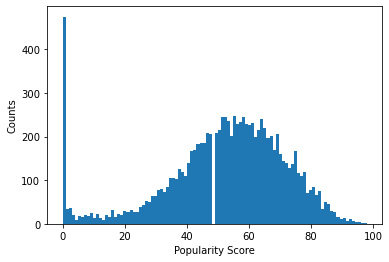

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math as math

data = "/Users/alvinlee/Downloads/transformed_file.csv"
df = pd.read_csv(data)

popularity = df.popularity

plt.hist(popularity, density=False, bins=100)  # density=False would make counts
plt.ylabel('Counts')
plt.xlabel('Popularity Score')


We notice there are a ton of 0 popularity-score songs in our dataset. Because it's throwing off the otherwise-normal distribution, we choose to remove those cells from our analysis.

(array([ 35.,  36.,  20.,   8.,  17.,  16.,  20.,  19.,  24.,  13.,  23.,
         13.,   8.,  20.,  16.,  31.,  16.,  23.,  20.,  30.,  26.,  32.,
         27.,  26.,  38.,  44.,  52.,  51.,  64.,  63.,  78.,  80.,  73.,
          0.,  85., 105., 104., 102., 125., 118., 109., 140., 166., 170.,
        183., 186., 186., 208., 207., 209., 216., 246., 244., 236., 202.,
        248., 228., 234., 244., 230., 226., 232., 199., 216., 241., 220.,
          0., 197., 202., 170., 207., 160., 143., 140., 129., 137., 166.,
        117., 110., 118.,  71.,  77.,  84.,  66.,  75.,  34.,  50.,  45.,
         29.,  27.,  15.,  11.,  13.,   7.,  12.,   7.,   3.,   4.,   1.,
          2.]),
 array([ 1.  ,  1.97,  2.94,  3.91,  4.88,  5.85,  6.82,  7.79,  8.76,
         9.73, 10.7 , 11.67, 12.64, 13.61, 14.58, 15.55, 16.52, 17.49,
        18.46, 19.43, 20.4 , 21.37, 22.34, 23.31, 24.28, 25.25, 26.22,
        27.19, 28.16, 29.13, 30.1 , 31.07, 32.04, 33.01, 33.98, 34.95,
        35.92, 36.89, 37.86, 38.83

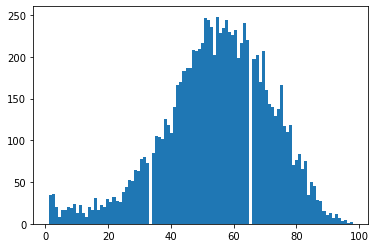

In [3]:
#drop 0-popularity values from dataframe
df = df[df.popularity >= 1]

#update popularity after dropping values
popularity = df.popularity

#check distribution again to check if correctly dropped
plt.hist(popularity, density=False, bins=100)  # density=False would make counts

After dropping 0-popularity score songs from the dataframe the distribution looks much better. Let's take a look at some statistics about popularity data.

In [4]:
x_bar = np.mean(popularity)
sample_sd = np.std(popularity)
deg_free = len(popularity) - 1

#CI_99 = stats.t.interval(alpha=0.99, df=len(popularity)-1, loc=np.mean(popularity), scale=stats.sem(popularity))

print("Sample mean is ", x_bar)
print("Sample standard deviation is ", sample_sd)
print("Degrees of freedom: ", deg_free)
#print("The 99% confidence interval for the mean is ", CI_997)

Sample mean is  54.44557195571956
Sample standard deviation is  17.23195736186597
Degrees of freedom:  9755


DONE OUTSIDE THIS NOTEBOOK:
We looked at the distributions of each feature to help identify outliers via excel.

Each feature's distribution looked fine except duration; one song had a length of 76.8
minutes, while the next closest had a duration of 25.8 minutes. We therefore want to
drop that column from our dataframe.

25.83275


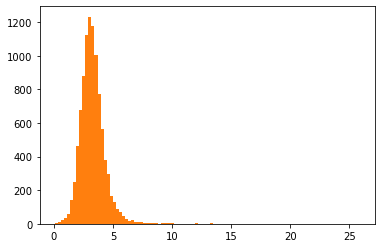

In [6]:
#Before dropping the value:
plt.hist(df.duration_ms, density=False, bins=100)

#Dropping the value:
df = df[df.duration_ms < 26]
plt.hist(df.duration_ms, density=False, bins=100)

print(df.duration_ms.max())

In [7]:
#Let's isolate the top 10% of songs in popularity to 
#see how they compare with the rest of the dataset.


top10pct_df = df.nlargest(math.floor(0.1*len(df.popularity)), 'popularity')
#top10pct_df.to_csv("/Users/alvinlee/Downloads/top10pct.csv")

print(top10pct_df.describe().loc[['mean', 'std', 'min', 'max']].transpose().loc[['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']])

#Inspecting the statistics of features from the rest of the dataset
bot90pct_df = df.nsmallest(math.ceil(0.9*len(df.popularity)), 'popularity')

print(bot90pct_df.describe().loc[['mean', 'std', 'min', 'max']].transpose().loc[['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']])

                        mean        std        min         max
popularity         81.344615   4.544126  76.000000   98.000000
danceability        0.700485   0.137296   0.216000    0.973000
energy              0.611462   0.165201   0.016700    0.974000
loudness           -6.661903   2.572875 -24.639000   -1.299000
speechiness         0.139454   0.118924   0.023200    0.619000
instrumentalness    0.013368   0.081210   0.000000    0.897000
liveness            0.183691   0.141397   0.021500    0.970000
valence             0.466320   0.221418   0.035200    0.962000
tempo             120.739608  28.388520  61.311000  207.970000
duration_ms         3.332004   0.911796   1.334683    9.802317
                        mean        std       min        max
popularity         51.463781  15.433691   1.00000   76.00000
danceability        0.705950   0.144957   0.00000    0.98800
energy              0.615252   0.161113   0.00527    0.99900
loudness           -7.312629   2.938653 -37.26400    3.22100
sp

In [8]:
#Inspecting statistics of features from the WHOLE dataset
print(df.describe().loc[['mean', 'std', 'min', 'max']].transpose().loc[['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']])

                        mean        std       min        max
popularity         54.450333  17.227306   1.00000   98.00000
danceability        0.705358   0.144219   0.00000    0.98800
energy              0.614908   0.161534   0.00527    0.99900
loudness           -7.247711   2.910490 -37.26400    3.22100
speechiness         0.209416   0.165517   0.00000    0.96200
instrumentalness    0.023934   0.126929   0.00000    0.99500
liveness            0.201653   0.164295   0.00000    0.99600
valence             0.457743   0.217591   0.00000    1.00000
tempo             123.330038  29.501611   0.00000  220.09900
duration_ms         3.274131   1.080479   0.08880   25.83275


Now that we've removed outliers and inspected the features of our data, we can move onto building our Random Forest model to predict popularity scores.

## Modeling the RandomForestRegressor

First, we need to change back the data we've transformed from discrete numeric to string (like song key and mode)

In [ ]:
#Import the data_file.csv into a pandas dataframe
#data_file = "/drive/My Drive/Colab Notebooks/data_file.csv"
data_file = '/Users/alvinlee/Downloads/fully_processed_data.csv'
df = pd.read_csv(data_file)

#check first 5 rows of dataframe to see if loaded correctly
print(df.head(5))
print(df.columns)

pd.options.mode.chained_assignment = None

#iterate through key column to replace key values with string
for i in range(0, len(df.key)):
    if df.key[i] == "C":
        df.key[i] = 0
    elif df.key[i] == "C#/Db":
        df.key[i] = 1
    elif df.key[i] == "D":
        df.key[i] = 2
    elif df.key[i] == "D#/Eb":
        df.key[i] = 3
    elif df.key[i] == "E":
        df.key[i] = 4
    elif df.key[i] == "F":
        df.key[i] = 5
    elif df.key[i] == "F#/Gb":
        df.key[i] = 6
    elif df.key[i] == "G":
        df.key[i] = 7
    elif df.key[i] == "G#/Ab":
        df.key[i] = 8
    elif df.key[i] == "A":
        df.key[i] = 9
    elif df.key[i] == "A#/Bb":
        df.key[i] = 10
    elif df.key[i] == "B":
        df.key[i] = 11

#iterate through mode column to replace 0 or 1 with Minor/Major
for i in range(0, len(df['mode'])):
    if df['mode'][i] == 'Minor':
        df['mode'][i] = 0
    elif df['mode'][i] == 'Major':
        df['mode'][i] = 1
#print(df.key.head())

for i in range(0, len(df['explicit'])):
    if df.explicit[i] == True:
        df.explicit[i] = 1
    elif df.explicit[i] == False:
        df.explicit[i] = 0

#check correct transformation
#print(df.explicit.head())
#print(df.explicit.tail())

df.to_csv('/Users/alvinlee/Downloads/RF_reg_ready.csv')

## Now we're finally ready to build and fit a model to our data.

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

data = "/Users/alvinlee/Downloads/RF_reg_ready.csv"
df = pd.read_csv(data)

#set the features of the model
x = df.drop(['artist','popularity','Unnamed: 0', 'Unnamed: 0.1', 'album', 'track_name', 'track_id'], axis=1)
#print(x)

#set target variable for model to predict
y = df.popularity
#print(y)

#create train and testing data partitions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, train_size=0.70)

RF_reg = ensemble.RandomForestRegressor(random_state=1)
RF_reg.fit(x_train, y_train)

y_pred = RF_reg.predict(x_test)

residuals = y_pred - y_test
sq_resid = []

for i in residuals:
    sq_resid.append(i**2)

std_error = (sum(sq_resid)/(len(sq_resid)-2))**(1/2)
MSE = np.mean(sq_resid)
RMSE = MSE**(1/2)

print("Margin of error is +/-", std_error*2)
print("Testing RMSE of our model is ", RMSE)